This Bayesian Network (a program created by Vijaysinh Lendave) is solving the Monty Hall Problem. This problem entails a competition in which a contestant must choose one of three doors, one of which conceals a price. The show’s host (Monty) unlocks an empty door and asks the contestant if he wants to swap to the other door after the contestant has chosen one.

The decision is whether to keep the current door or replace it with a new one. It is preferable to enter by the other door because the price is more likely to be higher.

If you want to check the original program, please go to: https://analyticsindiamag.com/a-guide-to-inferencing-with-bayesian-network-in-python/ 

Please note that the network image in your Google drive and you can also download/open it.

In [17]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [18]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import pylab as plt


In [21]:
# Defining Bayesian Structure
model = BayesianNetwork([('Guest', 'Host'), ('Price', 'Host')])
 
# Defining the CPDs:
cpd_guest = TabularCPD('Guest', 3, [[0.33], [0.33], [0.33]])
cpd_price = TabularCPD('Price', 3, [[0.33], [0.33], [0.33]])
cpd_host = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Guest', 'Price'], evidence_card=[3, 3])
 
# Associating the CPDs with the network structure.
model.add_cpds(cpd_guest, cpd_price, cpd_host)

In [22]:
#Checking the model structure and cpds will return True if every this is fine 
#else through an error msg
model.check_model()

True

In [24]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination
 
infer = VariableElimination(model)
#Evidence is needed to be given when we are evaluating posterior probability,
# here in our task evidence is nothing but which door is Guest selected and 
# where is the Price.
posterior_p = infer.query(['Host'], evidence={'Guest': 2, 'Price': 2})
print(posterior_p)


+---------+-------------+
| Host    |   phi(Host) |
+=========+=============+
| Host(0) |      0.5000 |
+---------+-------------+
| Host(1) |      0.5000 |
+---------+-------------+
| Host(2) |      0.0000 |
+---------+-------------+


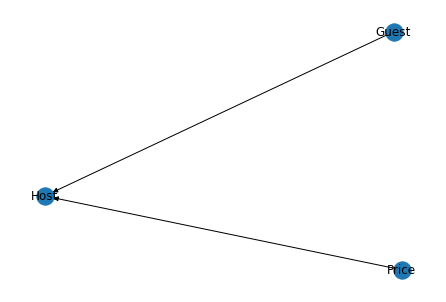

In [26]:
#Printing the model using PyLab
nx.draw(model, with_labels=True)


In [27]:
plt.savefig('model.png')
plt.close()